In [4]:
import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display


In [5]:
df=pd.read_csv('/content/Admission_Predict_Ver1.1.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/Admission_Predict_Ver1.1.csv'

In [ ]:
df=df.rename(columns={
    'GRE Score':'GRE',
    'TOEFL Score':'TOEFL',
    'Chance of Admit ':'Admit'
})

In [ ]:
display(df.head())
print()
display(df.info())
print()
display(df.describe())



,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


None

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [ ]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
df['University Rating'].value_counts()

3    162
2    126
4    105
5     73
1     34
Name: University Rating, dtype: int64

<Axes: xlabel='University Rating', ylabel='Count'>

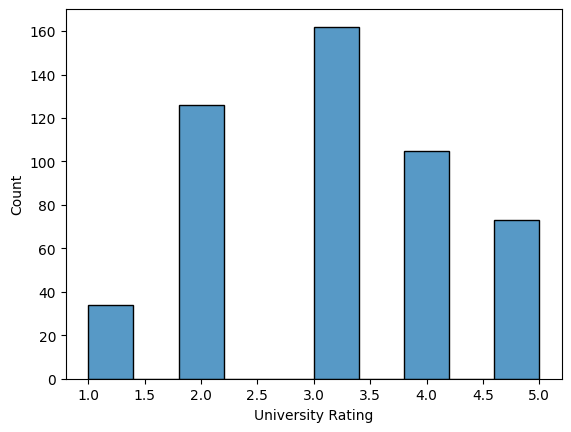

In [ ]:
sns.histplot(data=df, x='University Rating')

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Index(['Serial No.', 'GRE', 'TOEFL', 'University Rating', 'SOP', 'LOR ',
       'CGPA', 'Research', 'Admit'],
      dtype='object')

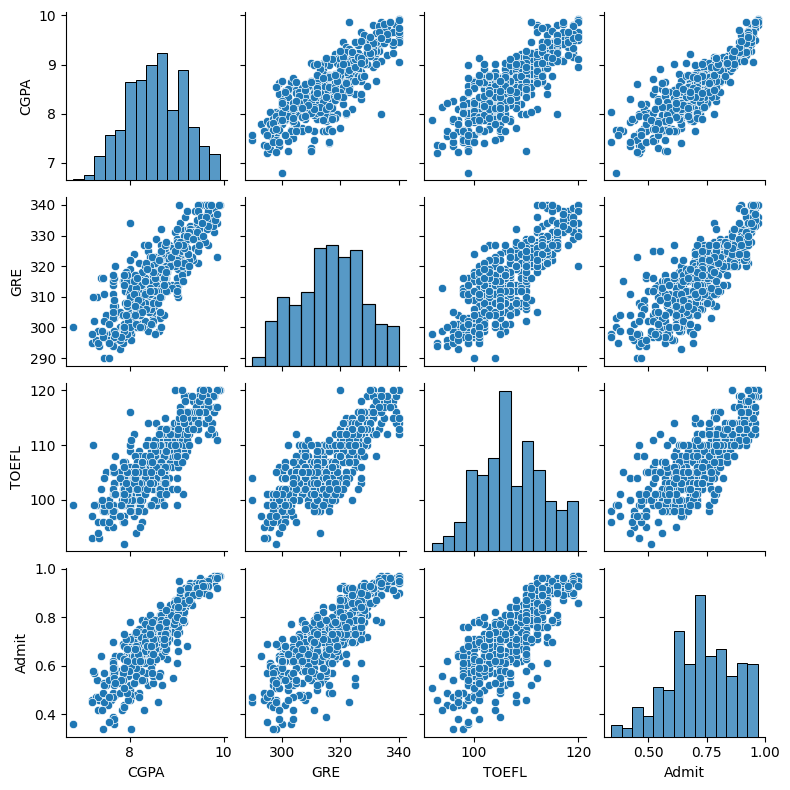

In [ ]:
# data=df[['CGPA','GRE Score', 'TOEFL Score', 'Chance of Admit']]
# sns.pairplot(data)

df1 = df[['CGPA','GRE','TOEFL','Admit']]
sns.pairplot(df1, height=2)

df.columns

<Axes: xlabel='Research', ylabel='count'>

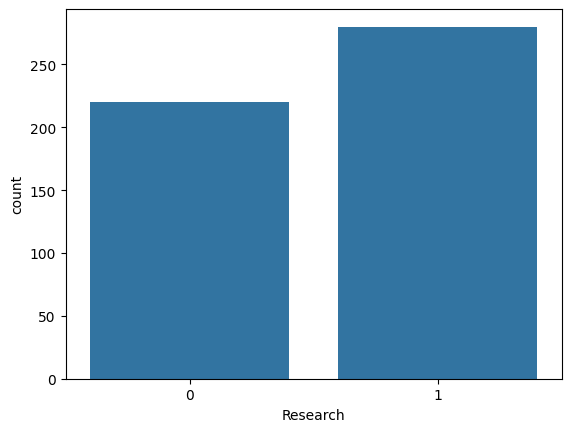

In [ ]:
sns.countplot(data=df, x='Research')

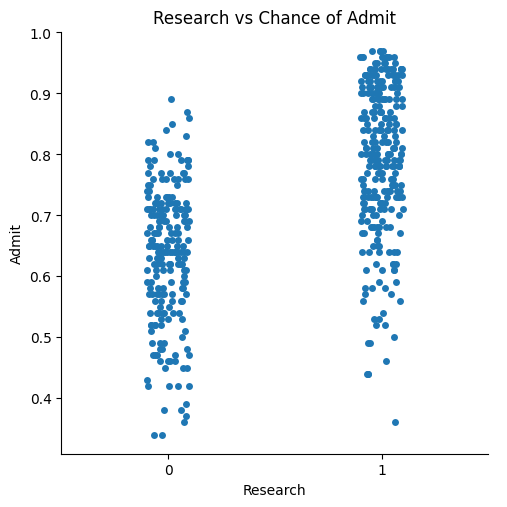

In [ ]:
sns.catplot(y='Admit', x='Research', data=df)
plt.title('Research vs Chance of Admit')
plt.show()

In [ ]:
df.drop(columns=['Serial No.'], inplace=True)

In [ ]:
X=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=69)

In [ ]:
X_test.shape

(100, 7)

In [64]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [88]:
# model=Sequential()

# model.add(Dense(7, activation='relu', input_dim=7))
# model.add(Dense(20, activation='relu'))
# model.add(Dense(1,activation='linear'))

input_ = keras.layers.Input(shape=X_train_scaled.shape[1:])
hidden_1 = keras.layers.Dense(20, activation = 'relu')(input_)
hidden_2 = keras.layers.Dense(1, activation = 'relu')(hidden_1)
concat = keras.layers.Concatenate()([input_, hidden_2])
output  = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])


In [87]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [89]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 7)                 56        
                                                                 
 dense_9 (Dense)             (None, 20)                160       
                                                                 
 dense_10 (Dense)            (None, 1)                 21        
                                                                 
Total params: 237 (948.00 Byte)
Trainable params: 237 (948.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [90]:
model.compile(loss='mean_squared_error', optimizer='Adam',metrics=['Accuracy'])

In [91]:
history=model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 1s 24ms/step - loss: 0.7118 - Accuracy: 0.0000e+00 - val_loss: 0.6249 - val_Accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 0.5671 - Accuracy: 0.0000e+00 - val_loss: 0.5014 - val_Accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 0.4483 - Accuracy: 0.0000e+00 - val_loss: 0.3974 - val_Accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 0.3469 - Accuracy: 0.0000e+00 - val_loss: 0.3055 - val_Accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 0.2561 - Accuracy: 0.0000e+00 - val_loss: 0.2243 - val_Accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 0.1776 - Accuracy: 0.0000e+00 - val_loss: 0.1521 - val_Accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 0.1101 - Accuracy: 0.0000e+00 - 

In [92]:
y_pred=model.predict(X_test_scaled)

4/4 [==============================] - 0s 3ms/step


In [93]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.670889942932368

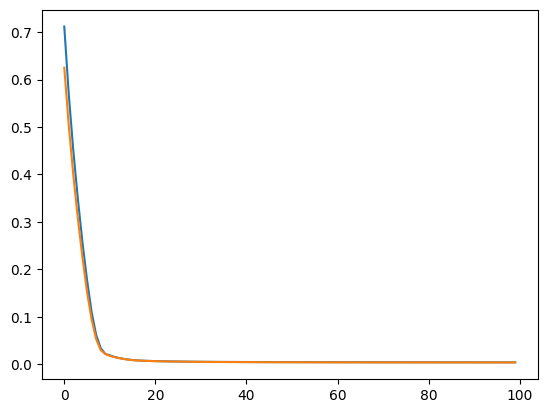

In [94]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])